In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Data import

Two datasets --- 
df_stores composed of information about the 1107 stores used for this study ---
df_train contains daily sales informations for 30 months from January 2013 to August 2015

In [2]:
df_stores = pd.read_csv("/Users/victor_03/Documents/Man 2019-2020/courses/Semester2/Data Analytics/Coursework/DA1920_store.csv", index_col=False)
df_train = pd.read_csv("/Users/victor_03/Documents/Man 2019-2020/courses/Semester2/Data Analytics/Coursework/DA1920_train.csv", index_col=False)

/Users/victor_03/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_stores = df_stores.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Unnamed: 10", "Unnamed: 11", "PromoInterval", "Promo2SinceWeek", "Promo2SinceYear"], axis=1)

In [5]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [6]:
df_stores.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    3
Promo2                 0
dtype: int64

## Store Type

Categorization of the data

In [8]:
le = preprocessing.LabelEncoder()
le.fit(df_stores["StoreType"].unique())
df_stores["StoreType"] = le.transform(df_stores["StoreType"].values)
df_stores["StoreType"] = df_stores["StoreType"].astype('category')

## Assortment

Categorization of the data

In [9]:
le=preprocessing.LabelEncoder()
le.fit(df_stores["Assortment"].unique())
df_stores["Assortment"] = le.transform(df_stores["Assortment"].values)
df_stores["Assortment"] = df_stores["Assortment"].astype('category')


## Competition Distance

Filling missing data with median of CompetitionDistance

In [10]:
median_distance = df_stores["CompetitionDistance"][df_stores["CompetitionDistance"].notna()].median()
df_stores["CompetitionDistance"][df_stores["CompetitionDistance"].isna()] = median_distance

/Users/victor_03/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


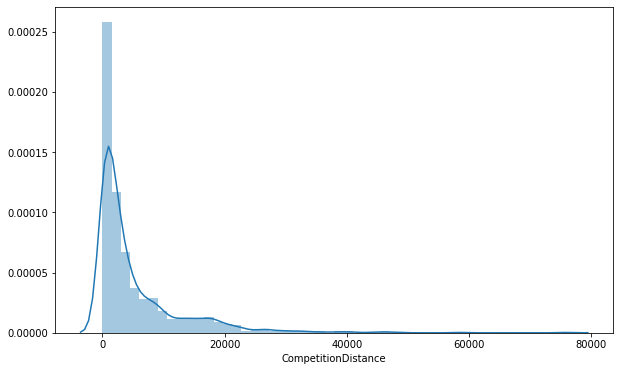

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_stores["CompetitionDistance"])

Changing extreme values by a limit of 40,000 to limit the impact of outliers

In [12]:
(df_stores["CompetitionDistance"])[df_stores["CompetitionDistance"]>40000]=40000

/Users/victor_03/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Merging to study both datasets

In [13]:
df = pd.merge(df_stores, df_train, on="Store")
df = df[df["Open"]==1]

In [14]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,0,1270.0,0,5,31/07/2015,5263,555,1,1,0,1
1,1,2,0,1270.0,0,4,30/07/2015,5020,546,1,1,0,1
2,1,2,0,1270.0,0,3,29/07/2015,4782,523,1,1,0,1
3,1,2,0,1270.0,0,2,28/07/2015,5011,560,1,1,0,1
4,1,2,0,1270.0,0,1,27/07/2015,6102,612,1,1,0,1


Preprocessing of the data: ---
formating the data --- 
Categorization for StaeHoliday

In [15]:
#df = df.drop(["Sales", "Customers", "Open"], axis=1)
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df["Month"] = df["Date"].dt.month
df["StateHoliday"][df["StateHoliday"]==0] = '0'
le=preprocessing.LabelEncoder()
le.fit(df["StateHoliday"].unique())
df["StateHoliday"] = le.transform(df["StateHoliday"].values)
df["StateHoliday"] = df["StateHoliday"].astype('category')

/Users/victor_03/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Plot of the Sales time series for all stores cumulated

In [17]:
df_2015 = df[df["Date"].dt.year==2015].sort_values(by="Date")
df_2014 = df[df["Date"].dt.year==2014].sort_values(by="Date")
df_2013 = df[df["Date"].dt.year==2013].sort_values(by="Date")

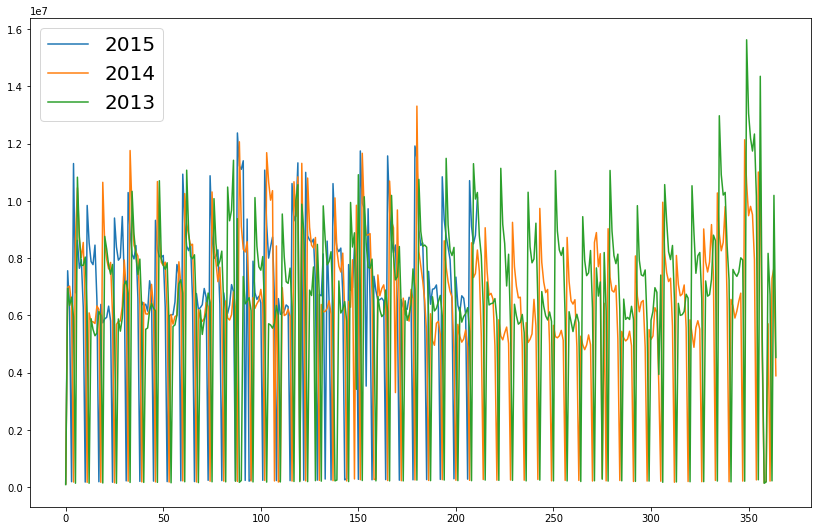

In [18]:
fig, ax = plt.subplots(figsize=(14, 9))
plt.plot(np.arange(0, len(df_2015.groupby(["Date"])["Sales"].sum()), 1), df_2015.groupby(["Date"])["Sales"].sum(), label='2015')
plt.plot(np.arange(0, len(df_2014.groupby(["Date"])["Sales"].sum()), 1), df_2014.groupby(["Date"])["Sales"].sum(), label='2014')
plt.plot(np.arange(0, len(df_2013.groupby(["Date"])["Sales"].sum()), 1), df_2013.groupby(["Date"])["Sales"].sum(), label='2013')
plt.legend(fontsize=20)

In [19]:
X = df

In [20]:
X["Promo2"] = X["Promo2"].astype('category')
X["DayOfWeek"] = X["DayOfWeek"].astype('category')
X["Promo"] = X["Promo"].astype('category')
X["SchoolHoliday"] = X["SchoolHoliday"].astype('category')
X["Month"] = X["Month"].astype('category')

In [21]:
y = df["Sales"]

The train set contains the data from January 1 2013 to July 15 2015. --- The last 6 weeks compose the test set

In [23]:
X_train = X[X["Date"]<'2015-06-15']
X_test = X[X["Date"]>='2015-06-15']
y_train = X_train["Sales"]
y_test = X_test["Sales"]
X_train_fit = X_train.drop(["Date", "Sales", "Customers", "Open", "Store"], axis=1)
X_test_fit = X_test.drop(["Date", "Sales", "Customers", "Open", "Store"], axis=1)

### In the first instance I used a Random Forest Regressor to forecast the sales

In [24]:
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train_fit, y_train)
rf_pred = regr.predict(X_test_fit)
X_test["pred_RF"] = rf_pred

/Users/victor_03/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/victor_03/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### A multilinear regression is also applied. 
Lower results are expected. But this model provided a better understanding of the influence of each feature on the forecast

In [25]:
lr = LinearRegression()
lr.fit(X_train_fit, y_train)
lr_pred = lr.predict(X_test_fit)
X_test["pred_LR"] = lr_pred

/Users/victor_03/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [98]:
coefs = np.append(lr.coef_, [lr.intercept_]).astype(int)
df_LR = pd.DataFrame(columns=np.append(X_train_fit.columns, "Intercept"))
df_LR.loc[0] = coefs
df_LR

,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Month,Intercept
0,-62,390,0,-837,-131,2152,1251,71,64,6359


The coefficients are highly valuable for the understanding --- CompetitionDistance has low impact on the sales. Holiday and Promos, on another hand, have an important impact on the sales

In [26]:
sales = X_test.groupby(["Date", "Store"])[["Sales"]].sum().sort_values(by="Date")
pred_RF = X_test.groupby(["Date", "Store"])[["pred_RF"]].sum().sort_values(by="Date")
pred_LR = X_test.groupby(["Date", "Store"])[["pred_LR"]].sum().sort_values(by="Date")

In [27]:
print('RMSE RF: ', round(m.sqrt(mean_squared_error(sales, pred_RF)), 2))
print('RMSE LR: ', round(m.sqrt(mean_squared_error(sales, pred_LR)), 2))

RMSE RF:  1438.32
RMSE LR:  2730.63


As expected, RF provides better forecasting than LR. Based on a previous work on this data, the performance of RF is highly satisfactory

### Plot of the results on one example: store 351 (randomly chosen)

In [28]:
store351 = X_test[X_test["Store"] == 351]

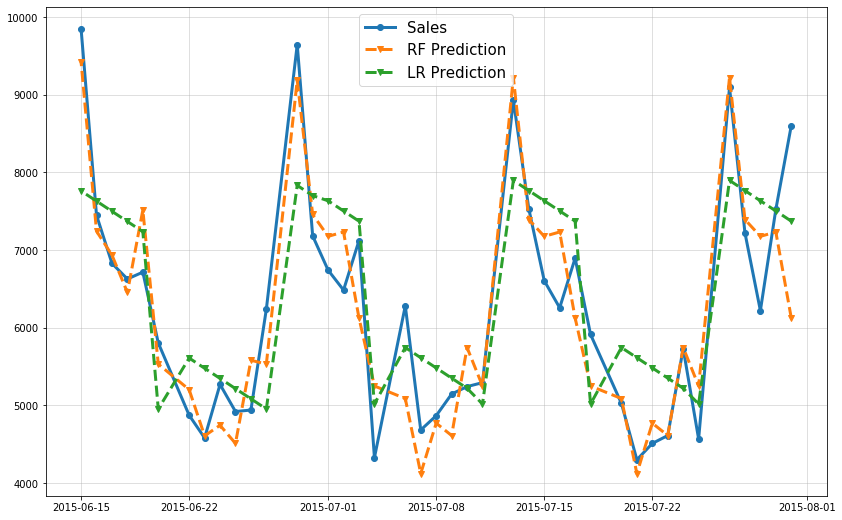

In [35]:
fig, ax = plt.subplots(figsize=(14, 9))
plt.plot(store351['Date'], store351["Sales"], label='Sales', linewidth=3, marker='o')
plt.plot(store351['Date'], store351["pred_RF"], label='RF Prediction', marker='v', linestyle='--', linewidth=3)
plt.plot(store351['Date'], store351["pred_LR"], label='LR Prediction', marker='v', linestyle='--', linewidth=3)
plt.grid(alpha=.5)
plt.legend(fontsize=15)

The Linear Regression is obviously less representative of the sales. It is nevertheless of high interest for the easiness of its implementation and the understanding it provides